<a href="https://colab.research.google.com/github/Advanced-Data-Science-TU-Berlin/Part-2/blob/main/notebooks/4_1_knn_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KNN Classification on Iris Data

Here we are using IRIS dataset which is one of the best know database in the pattern recognition literature. The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.
> For more information: [link](https://archive.ics.uci.edu/ml/datasets/iris)

Let's load the data. Since working with Pandas DataFrames are easier let's reformat the data into dataframe and then use pair-wise visualization:

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
Features Names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target Names: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


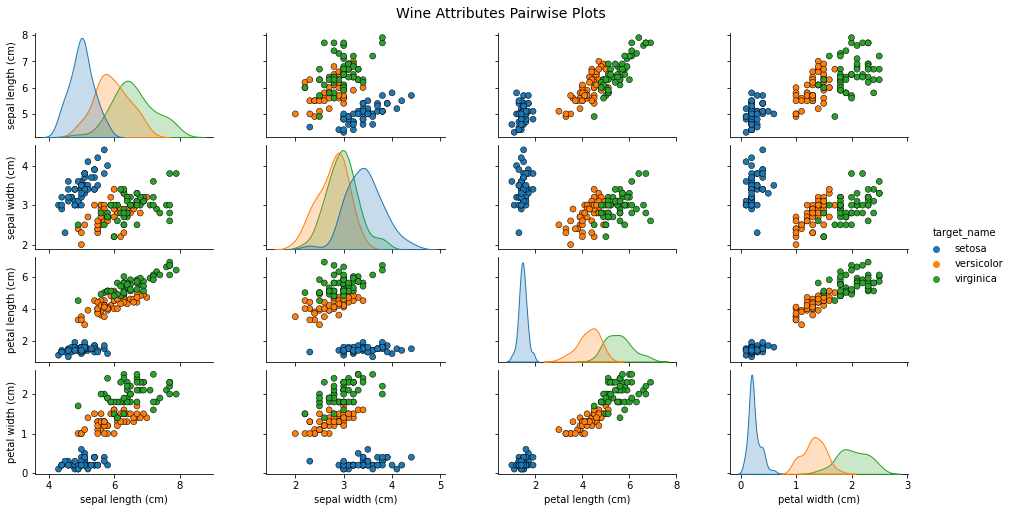

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets

# Load the IRIS dataset
iris = datasets.load_iris()
print(iris.keys())
print("Features Names:", iris.feature_names)
print("Target Names:", iris.target_names)

X = iris.data # Attributes
y = iris.target # Labels

# Create pandas dataframe
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y
df['target_name'] = df.apply(lambda row: iris.target_names[int(row['target'])], axis=1)
display(df.head())

# Pair-wise Scatter Plots
pp = sns.pairplot(df.drop(columns='target'), hue='target_name', height=1.8,
                  aspect=1.8, plot_kws=dict(edgecolor="k",
                  linewidth=0.5), diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Wine Attributes Pairwise Plots', fontsize=14)


As we can see here in almost all of the pair-wise scatter plots `setosa` group is separable from the other two. On the other hand, the `versicolor` and `virginica` groups are not linearly separable.

## Train/Test Split
Let's split the data into train and test sets. In sklearn.model_selection package there is a function to do so which makes our lives easier.
Remember you can also split data manually.

In [ ]:
from sklearn.model_selection import train_test_split
# Split the dataset into 80% train data and 20% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

## Feature Scaling
Before making any actual predictions, it is always a good practice to scale the features so that all of them can be uniformly evaluated.
> The gradient descent algorithm converges faster with normalized features

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Training and Predictions
It is extremely straight forward to train the KNN algorithm and make predictions with it, especially when using Scikit-Learn.

Let's take 5 neighbors into account for our first KNN model:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Initialized a KNN Classifier
classifier = KNeighborsClassifier(n_neighbors=5)
# Train the classifier on train data
classifier.fit(X_train, y_train)
# Predict the labels for unseen/test data using trained model
y_pred = classifier.predict(X_test)

## Evaluating the Algorithm
For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics. The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics. Take a look at the following script:

---Classification Report---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.92      1.00      0.96        12
           2       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30

---Confusion Matrix---
[[ 9  0  0]
 [ 0 12  0]
 [ 0  1  8]]


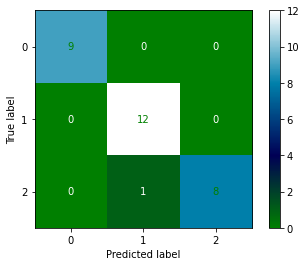

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
print("---Classification Report---")
print(classification_report(y_test, y_pred))
print("---Confusion Matrix---")
print(confusion_matrix(y_test, y_pred))
# Plot the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='ocean')

The results show that our KNN algorithm was able to classify all the records for group 0 with 100% accuracy, but the accuracy for the other two groups is slightly lower which is still good. Although the algorithm performed very well with this dataset, don't expect the same results with all applications. As KNN doesn't always perform as well with `high-dimensionality` or `categorical features`.

## Error Rate with the K Values
In the training and prediction section we said that there is no way to know beforehand which value of K that yields the best results in the first go. We randomly chose 5 as the K value and it just happen to give us good accuracy.

One way to help you find the best value of K is to plot the graph of K value and the corresponding error rate for the dataset.

In this section, we will plot the mean error for the predicted values of test set for all the K values between 1 and 40. To do so, let's first calculate the mean of error for all the predicted values where K ranges from 1 and 40. Execute the following script:



In [ ]:
test_error = []
train_error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    test_error.append(1 - knn.score(X_test, y_test))
    train_error.append(1 - knn.score(X_train, y_train))
    # Or we can calculate the error manually
    # error.append(np.mean(pred_i != y_test))

The next step is to plot the error values against K values. Execute the following script to create the plot:

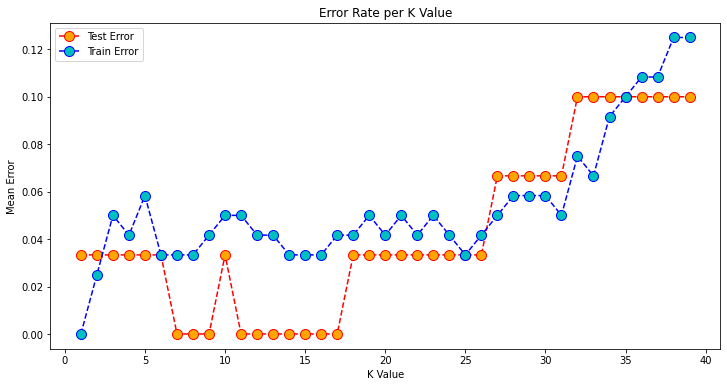

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), test_error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='orange', markersize=10, label='Test Error')
plt.plot(range(1, 40), train_error, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='c', markersize=10, label='Train Error')
plt.title('Error Rate per K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.legend()

From the output we can see that the mean error is zero when the value of the K is roughly between 7 and 10. I would advise you to play around with the value of K to see how it impacts the accuracy of the predictions.

Usefull Links:
- https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/